Author: Pragat Wagle

Assignment 5 Sales Properties

# Data Import

In [1]:
import pandas as pd
sales = pd.read_csv("Sales_Properties.csv")

In [2]:
sales.head()

,Date_Property_Sold,Postal_Code,Property-Price,Property_Type,Number_Bedrooms
0,2/7/2007 0:00,2607,525000,house,4
1,2/27/2007 0:00,2906,290000,house,3
2,3/7/2007 0:00,2905,328000,house,3
3,3/9/2007 0:00,2905,380000,house,4
4,3/21/2007 0:00,2906,310000,house,3


### Converting categorical variable into quantity.

In [3]:
from sklearn.preprocessing import OneHotEncoder

#Simple converting the categorical variable property_type into a numerical where 0 = house and 1 = unit
sales["Property_Type"] = sales["Property_Type"].astype('category')
sales = pd.get_dummies(sales, columns=['Property_Type'])

In [4]:
sales.corr()

,Postal_Code,Property-Price,Number_Bedrooms,Property_Type_house,Property_Type_unit
Postal_Code,1.000000,-0.150548,0.225761,0.257779,-0.257779
Property-Price,-0.150548,1.000000,0.484212,0.299808,-0.299808
Number_Bedrooms,0.225761,0.484212,1.000000,0.672036,-0.672036
Property_Type_house,0.257779,0.299808,0.672036,1.000000,-1.000000
Property_Type_unit,-0.257779,-0.299808,-0.672036,-1.000000,1.000000


In [5]:
X = sales[set(sales.columns) - set(['Property-Price','Date_Property_Sold'])]
Y = sales[['Property-Price']]

In [6]:
X

,Property_Type_house,Number_Bedrooms,Property_Type_unit,Postal_Code
0,1,4,0,2607
1,1,3,0,2906
2,1,3,0,2905
3,1,4,0,2905
4,1,3,0,2906
...,...,...,...,...
29575,0,3,1,2900
29576,0,2,1,2612
29577,0,2,1,2912
29578,0,2,1,2601


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [10]:
X_train

,Property_Type_house,Number_Bedrooms,Property_Type_unit,Postal_Code
4102,1,4,0,2611
13719,1,3,0,2614
280,1,3,0,2615
2705,1,4,0,2617
8712,1,3,0,2607
...,...,...,...,...
13123,1,3,0,2905
19648,1,2,0,2602
9845,1,3,0,2605
10799,1,5,0,2602


### Drop NA

In [11]:
sales = sales.dropna()

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

pred = mdl.predict(X_test)
r2_lin = r2_score(y_test, pred)
print(r2_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, pred))
print(rmse_lin)

0.30362627916132046
230415.65985007124


### Visualization

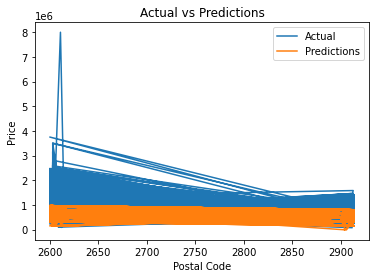

In [15]:
import matplotlib.pyplot as plt


plt.plot(X_test['Postal_Code'], y_test, label = 'Actual')
plt.plot(X_test['Postal_Code'], pred, label ='Predictions')
  
# naming the x axis
plt.xlabel('Postal Code')
# naming the y axis
plt.ylabel('Price')
  
# giving a title to my graph
plt.title('Actual vs Predictions')
  
# function to show the plot
plt.legend()
plt.show()

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# higher C is lighter penalty, range is between 0-1
lr = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=.0001)
lr.fit(X_train, np.ravel(y_train,order='C'))

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.0001, multi_class='multinomial', solver='saga')

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

lr_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, lr_pred)
print(r2_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
print(rmse_lin)

-0.04382305232822192
230415.65985007124


### Visualization

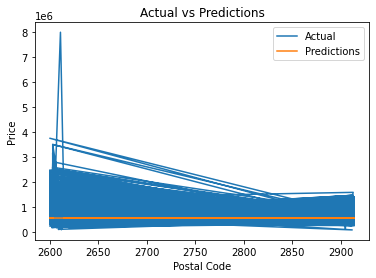

In [19]:
import matplotlib.pyplot as plt


plt.plot(X_test['Postal_Code'], y_test, label = 'Actual')
plt.plot(X_test['Postal_Code'], lr_pred, label ='Predictions')
  
# naming the x axis
plt.xlabel('Postal Code')
# naming the y axis
plt.ylabel('Price')
  
# giving a title to my graph
plt.title('Actual vs Predictions')
  
# function to show the plot
plt.legend()
plt.show()

# Elastic Net

In [20]:
from sklearn.linear_model import ElasticNet
ENR = ElasticNet().fit(X_train, y_train)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

en_pred = ENR.predict(X_test)
r2_en = r2_score(y_test, en_pred)
print(r2_en)
rmse_en = np.sqrt(mean_squared_error(y_test, en_pred))
print(rmse_en)

0.27639743082133983
234877.19683931154


### Visualization

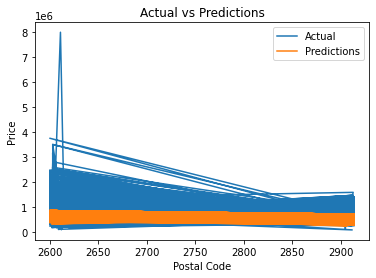

In [22]:
import matplotlib.pyplot as plt


plt.plot(X_test['Postal_Code'], y_test, label = 'Actual')
plt.plot(X_test['Postal_Code'], en_pred, label ='Predictions')
  
# naming the x axis
plt.xlabel('Postal Code')
# naming the y axis
plt.ylabel('Price')
  
# giving a title to my graph
plt.title('Actual vs Predictions')
  
# function to show the plot
plt.legend()
plt.show()

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=25,random_state=0)
rf_regressor.fit(X_train,y_train)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(n_estimators=25, random_state=0)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

pred_rf = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
print(r2_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print(rmse_rf)

0.5902501265097131
176746.25445010504


### Visualization 

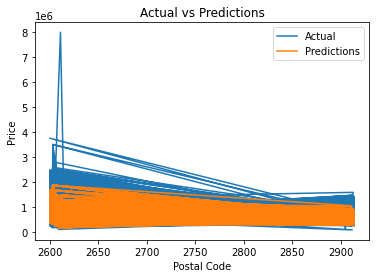

In [25]:
import matplotlib.pyplot as plt


plt.plot(X_test['Postal_Code'], y_test, label = 'Actual')
plt.plot(X_test['Postal_Code'], pred_rf, label ='Predictions')
  
# naming the x axis
plt.xlabel('Postal Code')
# naming the y axis
plt.ylabel('Price')
  
# giving a title to my graph
plt.title('Actual vs Predictions')
  
# function to show the plot
plt.legend()
plt.show()

# Comparision

Looking at the correlation Number_of_Bedrooms had a correlation value of 0.484 and Property_Type a value of 0.300 against Property-Price and thus can be concluded were the top predictive features in the dataset. Using get_dummies the Property_Type was changed from a strint text to a numerical variable for training the model. Overall RandomForestRegressor perfomed best on the data provided with Linear Regression at second. The coefficient of determination or R squared of the prediction was calculated for RandomForestRegressor to be a value of .5906, for Linear Regression a value of .3096, and Logistic Regression and Elastic Net had values near 0. The root mean sqared error also verified the above conclusion and was calculated to be 176663 for RandomForestRegressor, 229400 for Linear Regression, 276130 for Elastic Net, and 282100 for Elastic Net. Overall RandomForestRegressor performed the best on this dataset. The data set was very small and had a limited amount of features which led to a weakly trained model with weak predictability. With higher quality data and a higher quantity of data with more features/dimensions I would expect scores to improve drastically for each model. Looking at the graph you can see that the range of predictions were highest for Random Forest. Removing outliers would have been something that I would do to improve the model.

# SHAP for Three Models

In [ ]:
!pip install shap

## Linear Regression SHAP

In [ ]:
import shap

In [ ]:
# Fits the explainer
explainer = shap.Explainer(mdl.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

Shap Interpretation Linear Regression:

The bar plot shows the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples. The bar plot shows that number_bedrooms and postal_code are the most important features in prediction while the property types have very little impact. Looking at beeswarm plot number_bedrooms at high values have a positive impact an at low values have a negative impact, which means that more rooms means higher cost. Also lower postal code values have a higher impact and could be interpreted that the lower zip values are higher quality residential areas. Property type showed very impact.

## Logistic Regression Shap

In [ ]:
# Fits the explainer
explainer = shap.Explainer(lr.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values)

Shap Interpretation Logistic Regression:

The bar plot shows the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples. The bar plot shows that number_bedrooms and postal_code are the most important features in prediction. Looking at beeswarm plot, it is difficult to interpret anything for the logistic regression model.

## Random Forest Shap

In [ ]:
# Fits the explainer
explainer = shap.Explainer(rf_regressor.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

Shap Interpretation Random Forest:

The bar plot shows the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples. The bar plot for random forest which performed the best shows that postal_code is the most impactful feature with number_bedrooms a close second and only in this model did property types have noticeble impact. Looking at beeswarm plot number_bedrooms at high values have a positive impact an at low values have a negative impact, which means that more rooms means higher cost. Also lower postal code values have a higher impact and could be interpreted that the lower zip values are higher quality residential areas. Property type of house had a postive impact on price while of type unit had a negative impact on price.

# Other Technique Integrated Gradient

There are no other techniques that I knew of but I did research and found Integrated Gradients (IG). 

"IG operates by considering a straight line path, in feature space, from the input at hand (e.g., an image from a training set) to a certain baseline input (e.g., a black image), and integrating the gradient of the prediction with respect to input features (e.g., image pixels) along this path."

The above is a summary directly quoted from https://www.fiddler.ai/blog/should-you-explain-your-predictions-with-shap-or-ig.

Integrated graidient along that path from the baseline to the input can along that trajectory can determine the gradient respect to that input feature and attribute that change in predictive probability back to that input feature. By doing this along the trajectory of that straight line it can determine what input features have a higher impact. Also it is faster than SHAP. There are limiations in that IG requires a continuous and piece-wise differentiable function.


# Citations:

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html

https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

https://www.kaggle.com/code/samsonqian/predicting-house-prices-with-regression

https://www.fiddler.ai/blog/should-you-explain-your-predictions-with-shap-or-ig